In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

### 导入matplotlib

In [2]:
dtt = []
with open('/Users/user/Desktop/data/final_group_homework/tianya_bbs_threads_network1.txt', 'r') as f:
    for line in f:
        pnum, link, time, author_id, author, content = line.replace('\n', '').split('\t')
        dtt.append([pnum, link, time, author_id, author, content])
len(dtt)

10393

### 导入之前抓取好的天涯回帖数据

In [3]:
import pandas as pd
dt = pd.DataFrame(dtt)
dt=dt.rename(columns = {0:'page_num', 1:'link', 2:'time', 3:'author',4:'author_name', 5:'reply'})
dt[:5]

,page_num,link,time,author,author_name,reply
0,1,/post-free-1358675-1.shtml,2008-07-07 00:14:00,17696881,拎菜刀,致版主： 鉴于本长篇具有很强的纪实性，所以文中会涉及到很多真实的商业名词，与广告没啥关...
1,1,/post-free-1358675-1.shtml,2008-07-07 00:27:24,15102217,文化认同统一之本,一楼看连载
2,1,/post-free-1358675-1.shtml,2008-07-07 00:27:41,17696881,拎菜刀,<font color=blue><a name=002></a> 2． 就这样上了黄船—...
3,1,/post-free-1358675-1.shtml,2008-07-07 00:28:05,16223044,玩的就是女人,沙发？？？？？？
4,1,/post-free-1358675-1.shtml,2008-07-07 00:35:57,12226058,草发,香烟的事说完了？ 又来情趣店的事了？ 谁再来个卖包子的事。。。。


### 导入pandas，打印前5条回帖

In [4]:
# extract date from datetime
date = map(lambda x: x[:10], dt.time)
dt['date'] = pd.to_datetime(date)

In [5]:
dt[:5]

,page_num,link,time,author,author_name,reply,date
0,1,/post-free-1358675-1.shtml,2008-07-07 00:14:00,17696881,拎菜刀,致版主： 鉴于本长篇具有很强的纪实性，所以文中会涉及到很多真实的商业名词，与广告没啥关...,2008-07-07
1,1,/post-free-1358675-1.shtml,2008-07-07 00:27:24,15102217,文化认同统一之本,一楼看连载,2008-07-07
2,1,/post-free-1358675-1.shtml,2008-07-07 00:27:41,17696881,拎菜刀,<font color=blue><a name=002></a> 2． 就这样上了黄船—...,2008-07-07
3,1,/post-free-1358675-1.shtml,2008-07-07 00:28:05,16223044,玩的就是女人,沙发？？？？？？,2008-07-07
4,1,/post-free-1358675-1.shtml,2008-07-07 00:35:57,12226058,草发,香烟的事说完了？ 又来情趣店的事了？ 谁再来个卖包子的事。。。。,2008-07-07


In [6]:
import pandas as pd

df = pd.read_csv('/Users/user/Desktop/data/final_group_homework/tianya_bbs_threads_list情趣.txt', sep = "\t", header=None)
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:2]

,title,link,author,author_page,click,reply,time
0,情趣店里那些事儿---长篇纪实连载,/post-free-1358675-1.shtml,拎菜刀,http://www.tianya.cn/17696881,938472,6301,2008-07-07 00:14
1,今天晚上和老婆一起去逛了一次情趣用品店.,/post-free-1533379-1.shtml,张楚楼,http://www.tianya.cn/15801770,89462,534,2009-04-04 00:56


### 导入之前抓取的所有关键词相关帖子，显示前两条的链接、作者ID、作者主页、点击数、回复数和发布时间

In [7]:
from collections import defaultdict

link_user_dict = defaultdict(list)
for i in range(len(dt)):
    link_user_dict[dt.link[i]].append(dt.author[i])

In [8]:
df['user'] = [len(link_user_dict[l]) for l in df.link]
df[:2] 

,title,link,author,author_page,click,reply,time,user
0,情趣店里那些事儿---长篇纪实连载,/post-free-1358675-1.shtml,拎菜刀,http://www.tianya.cn/17696881,938472,6301,2008-07-07 00:14,6159
1,今天晚上和老婆一起去逛了一次情趣用品店.,/post-free-1533379-1.shtml,张楚楼,http://www.tianya.cn/15801770,89462,534,2009-04-04 00:56,495


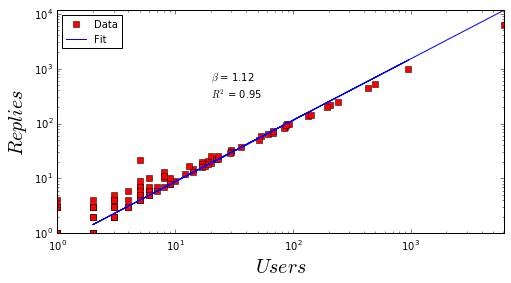

In [9]:
import statsmodels.api as sm
import numpy as np

x = np.log(df.user+1)
y = np.log(df.reply+1)
xx = sm.add_constant(x, prepend=True)
res = sm.OLS(y,xx).fit()
constant,beta = res.params
r2 = res.rsquared
fig = plt.figure(figsize=(8, 4),facecolor='white')
plt.plot(df.user, df.reply, 'rs', label= 'Data')
plt.plot(np.exp(x), np.exp(constant + x*beta),"-", label = 'Fit')
plt.yscale('log');plt.xscale('log')
plt.xlabel(r'$Users$', fontsize = 20)
plt.ylabel(r'$Replies$', fontsize = 20)
plt.text(max(df.user)/300,max(df.reply)/20,
         r'$\beta$ = ' + str(round(beta,2)) +'\n' + r'$R^2$ = ' + str(round(r2, 2)))
plt.legend(loc=2,fontsize=10, numpoints=1)
plt.axis('tight')
plt.show()

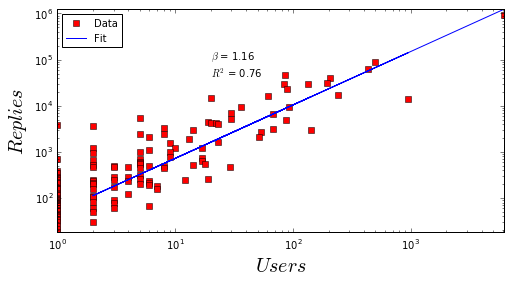

In [10]:
x = np.log(df.user+1)
y = np.log(df.click+1)
xx = sm.add_constant(x, prepend=True)
res = sm.OLS(y,xx).fit()
constant,beta = res.params
r2 = res.rsquared
fig = plt.figure(figsize=(8, 4),facecolor='white')
plt.plot(df.user, df.click, 'rs', label= 'Data')
plt.plot(np.exp(x), np.exp(constant + x*beta),"-", label = 'Fit')
plt.yscale('log');plt.xscale('log')
plt.xlabel(r'$Users$', fontsize = 20)
plt.ylabel(r'$Replies$', fontsize = 20)
plt.text(max(df.user)/300,max(df.click)/20,
         r'$\beta$ = ' + str(round(beta,2)) +'\n' + r'$R^2$ = ' + str(round(r2, 2)))
plt.legend(loc=2,fontsize=10, numpoints=1)
plt.axis('tight')
plt.show()

In [11]:
dt.time = pd.to_datetime(dt.time)
dt['month'] = dt.time.dt.month
dt['year'] = dt.time.dt.year
dt['day'] = dt.time.dt.day
type(dt.time[0])

pandas.tslib.Timestamp

In [12]:
d = dt.year.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
ds = dd.cumsum()

In [13]:
def getDate(dat):
    dat_date_str = map(lambda x: str(x) +'-01-01', dat.index)
    dat_date = pd.to_datetime(dat_date_str)
    return dat_date

ds.date = getDate(ds)
dd.date = getDate(dd)

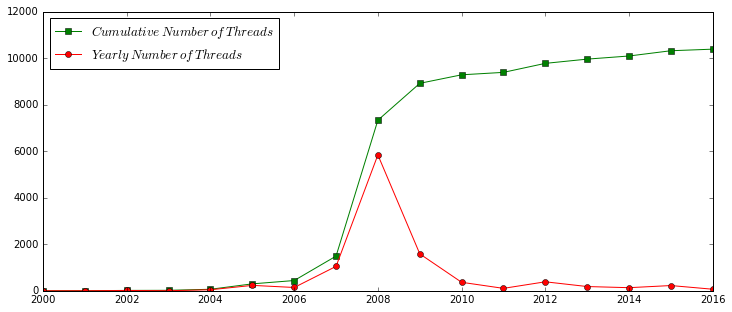

In [14]:
fig = plt.figure(figsize=(12,5))
plt.plot(ds.date, ds.year, 'g-s', label = '$Cumulative\: Number\:of\: Threads$')
plt.plot(dd.date, dd.year, 'r-o', label = '$Yearly\:Number\:of\:Threads$')
plt.legend(loc=2,numpoints=1,fontsize=13)
plt.show()

In [15]:
dt.reply[:55]

0     致版主：    鉴于本长篇具有很强的纪实性，所以文中会涉及到很多真实的商业名词，与广告没啥关...
1                                                 一楼看连载
2     <font color=blue><a name=002></a>　　2． 就这样上了黄船—...
3                                              沙发？？？？？？
4                    香烟的事说完了？　　又来情趣店的事了？　　谁再来个卖包子的事。。。。
5                                              潜力贴，留爪靠前
6                            不会是我的第一个沙发吧？　　MS有广告的嫌疑哈，呵呵
7                                    下一篇:真真假假催情药儿,明天上午发
8                                        支持楼主，继续发帖。　　留名
9                                              果然有点广告嫌疑
10                    纪实性很强的长篇,商业名词难免,版主和看官谅解。因为真实，所以诱人
11    <font color=blue><a name=002></a>　　　　3、催情药—情趣店...
12                                                   留爪
13                                        很新鲜，留个印子继续关注。
14                                                 撑着看~
15    <font color=blue><a name=004></a>　　3、催情药—情趣店里那...
16                                      难道不适合本版胃口?人气好冷淡
17    4．虚伪的婚内性—情趣店里那些事儿—长篇连载　　　　　　　　 客厅是贵妇,厨房是主妇

### 显示第1-54条回帖内容

In [48]:
import re
tweet = u"豌豆青青草上飞	回复第3214楼，//@拎菜刀　　两年前的心血之作，自己回来串串门。此连载已经在2010年出版，书名为《成人之美  我开情趣店的那些日子》　　--------------------------　　阁下就是蔺德刚?!顶佩"
RTpattern = r'''//?@(\w+)'''
for word in re.findall(RTpattern, tweet, re.UNICODE):
    print word

拎菜刀


### 提取被回复的人的ID

In [44]:
RTpattern = r'''@(\w+)\s'''
re.findall(RTpattern, dt.reply[11].decode('utf8'), re.UNICODE)

[]

In [45]:
if re.findall(RTpattern, dt.reply[0].decode('utf8'), re.UNICODE):
    print True
else:
    print False

False


In [46]:
for k, tweet in enumerate(dt.reply[62:65]):
    tweet = tweet.decode('utf8')
    RTpattern = r'''@(\w+)\s'''
    for person in re.findall(RTpattern, tweet, re.UNICODE):
        print k,'\t',dt.author_name[k],'\t', person,'\t\t', tweet[:30]

In [20]:
print dt.reply[80]

问题是你怎么知道那么多是女人隐私呢.买东西的时候告诉你的吗


In [21]:
link_author_dict = {}
for i in range(len(df)):
    link_author_dict[df.link[i]] =df.author[i] 
    

In [22]:
graph = []
for k, tweet in enumerate(dt.reply):
    tweet = tweet.decode('utf8')
    url = dt.link[k]
    RTpattern = r'''@(\w+)\s'''
    persons = re.findall(RTpattern, tweet, re.UNICODE)
    if persons:
        for person in persons:
            graph.append([dt.author_name[k].decode('utf8'), person])
    else:
        graph.append( [dt.author_name[k].decode('utf8'), link_author_dict[url].decode('utf8')]  )
        

In [23]:
len(graph)

10424

In [24]:
for x, y in graph[:3]:
    print x, y

拎菜刀 拎菜刀
文化认同统一之本 拎菜刀
拎菜刀 拎菜刀


In [25]:
import networkx as nx

In [26]:
G = nx.DiGraph()
for x,y in graph:
    if x != y:
        G.add_edge(x,y)

In [27]:
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 4389\nNumber of edges: 4445\nAverage in degree:   1.0128\nAverage out degree:   1.0128'

In [28]:
GU=G.to_undirected(reciprocal=True)
graphs = list(nx.connected_component_subgraphs(GU))

In [29]:
import numpy as np
size = []
for i in graphs:
    size.append(len(i.nodes()))
len(size), np.max(size)

(4336, 19)

In [30]:
gs = []
for i in graphs:
    if len(i.nodes()) >5:
        gs.append(i)
len(gs)

3

In [31]:
for g in gs:
    print len(g.nodes())

6
19
7


In [32]:
g_max = gs[0]
len(g_max.nodes())

6

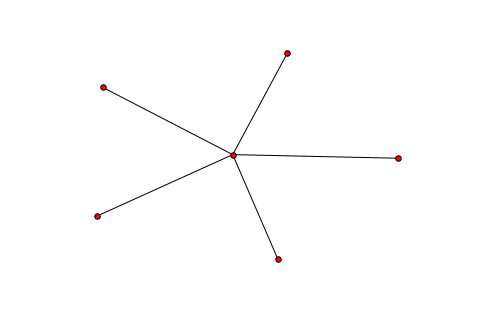

In [33]:
pos = nx.spring_layout(g_max)          
nx.draw(g_max,pos,with_labels=False,node_size = 30)  
plt.show() 

### 定义一个布局，绘制规则图的图形